# Qiskit Notebook 3 - Qiskit Transpilation

In this Notebook, we will learn about:

* Qiksit Transpilation Steps
* Preset Pass Managers

In [ ]:
# If using Google Colab, uncomment the following

#!pip install -q qiskit
#!pip install -q qiskit[visualization]
#!pip install -q qiskit-ibm-runtime
#!pip install -q qiskit-aer

# Qiskit Transpiler

Transpilation is the process of taking a given input circuit and rewriting it to an equivalent circuit for a specific quantum device, and/or to optimize the circuit for execution on a real quantum system. This is necessary because not all quantum devices work the same way. The instructions you send to one device might not be compatible with a different quantum backend. 

This process includes rewriting general gates or quantum subroutines in terms of the native gate set of the device, reducing the number of gates by getting rid of redundant gates, choosing gates with lower amounts of noise, exchange qubits to satisfy the hardware topology, etc. The logic flow need not be linear, but a standard compilation flow follows a structure as below:

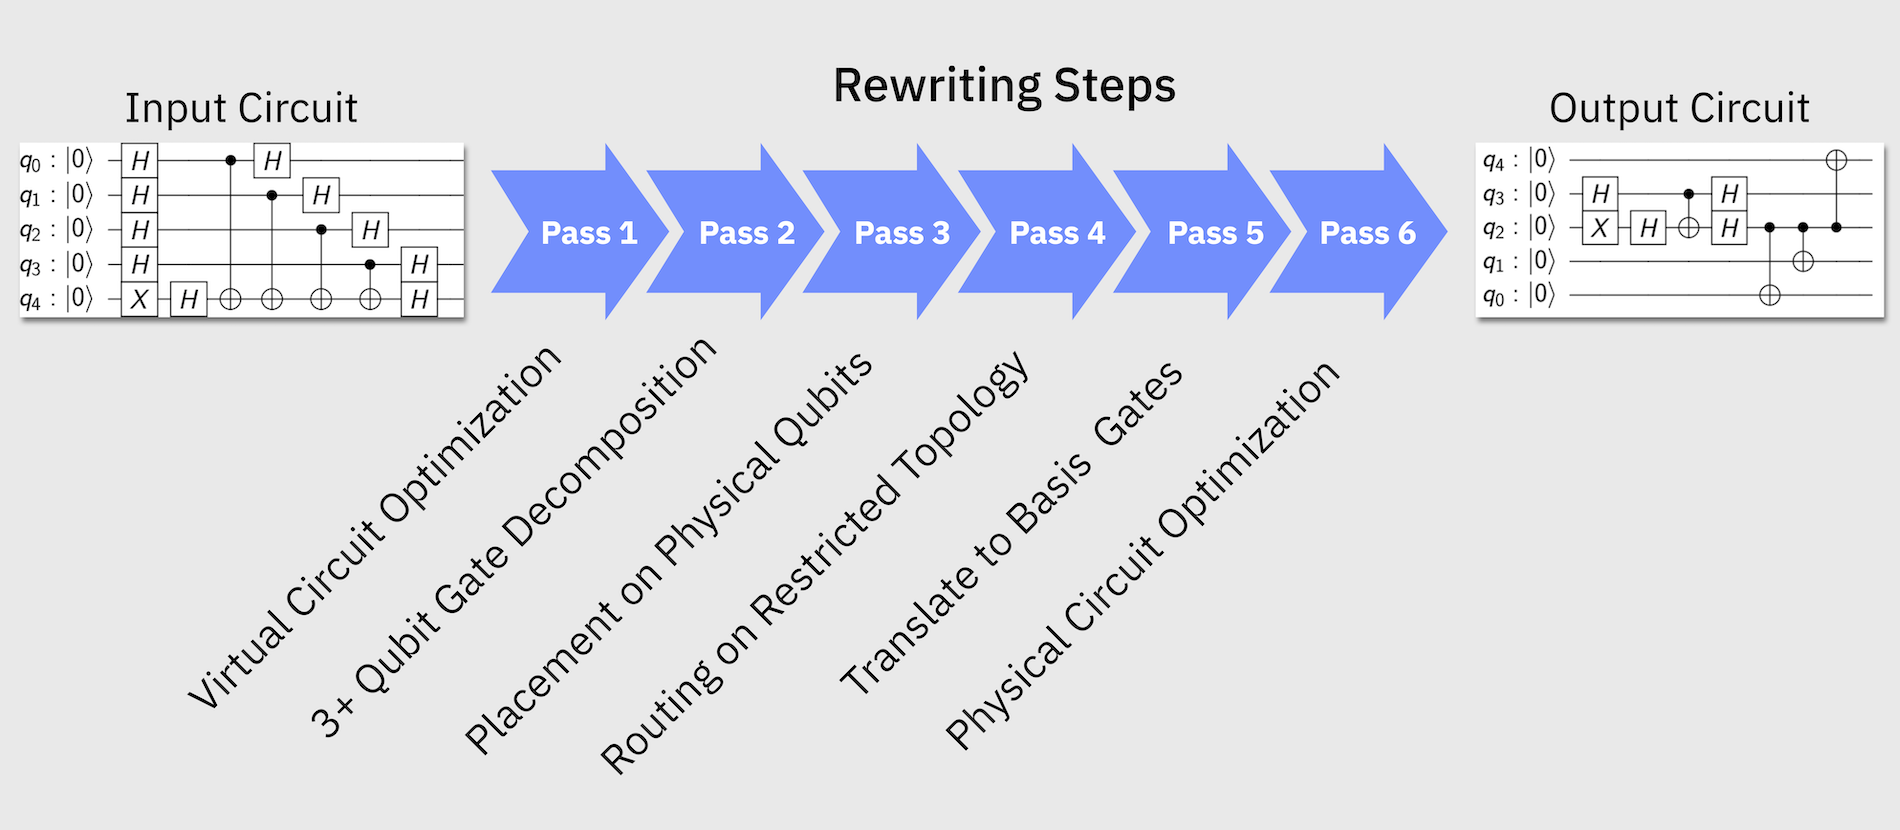

**Exercise**: Create a circuit using the `QuantumCircuit` class that implements the left (right) circuit of the above image, draw it and simulate it using the `AerSimulator` with 100 shots. Which measurement outcomes are we obtaining? Use the `Statevector` to also get the state vector!

Statevector([-3.34367212e-84+0.j,  2.50930458e-67+0.j, -6.49792881e-68+0.j,
              7.66601108e-51+0.j,  3.42647533e-68+0.j,  5.09296234e-51+0.j,
              1.02197163e-50+0.j,  2.52632307e-34+0.j, -1.13301042e-66+0.j,
              4.78043169e-51+0.j,  8.57127889e-51+0.j, -2.70574308e-34+0.j,
             -5.41349828e-51+0.j,  1.06113676e-34+0.j,  2.72469129e-34+0.j,
              1.40915924e-17+0.j, -1.13659822e-67+0.j, -1.39971287e-50+0.j,
              1.77075295e-51+0.j,  2.51784366e-34+0.j,  1.31572957e-51+0.j,
              2.40564422e-34+0.j,  2.80354984e-34+0.j,  1.90484157e-17+0.j,
             -4.08405508e-50+0.j, -3.45159781e-34+0.j, -3.65727913e-34+0.j,
             -8.90187929e-18+0.j,  9.18552026e-34+0.j, -1.34692639e-17+0.j,
              2.36158002e-17+0.j,  1.00000000e+00+0.j],
            dims=(2, 2, 2, 2, 2))
{'11111': 100}


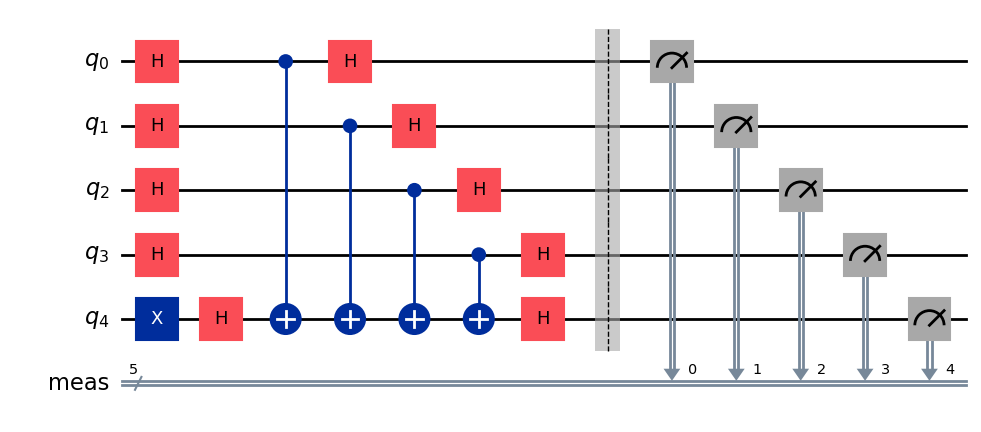

In [2]:
from qiskit.circuit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector


backend = AerSimulator()

test_circuit1 = QuantumCircuit(5)
test_circuit1.h(range(0,4))
test_circuit1.x(4)
test_circuit1.h(4)

test_circuit1.cx(0,4)
test_circuit1.cx(1,4)
test_circuit1.cx(2,4)
test_circuit1.cx(3,4)

test_circuit1.h(range(0,5))

print(Statevector(test_circuit1))

test_circuit1.measure_all()

counts_1 = backend.run(test_circuit1, shots=100).result().get_counts()
print(counts_1)

test_circuit1.draw('mpl')
#

Statevector([5.97792087e-34+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 3.25176795e-17+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 6.22328532e-19+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 1.00000000e+00+0.j],
            dims=(2, 2, 2, 2, 2))
{'11111': 100}


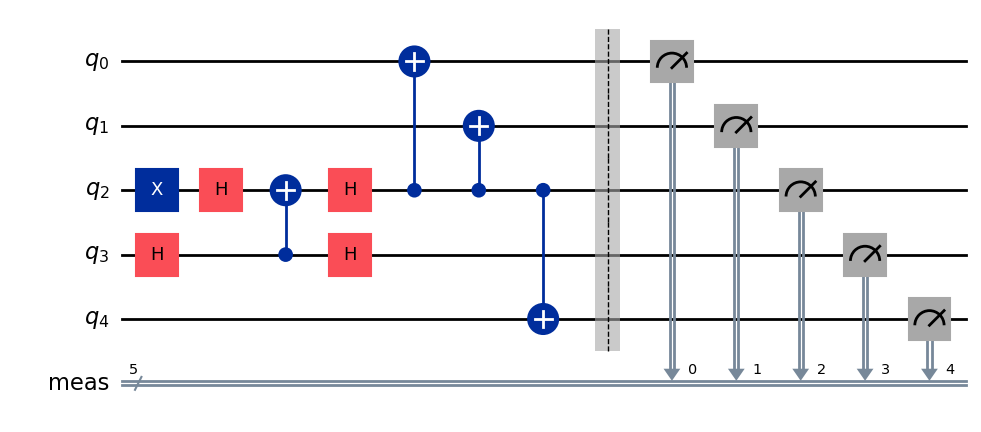

In [3]:
test_circuit2 = QuantumCircuit(5)
test_circuit2.h(3)
test_circuit2.x(2)
test_circuit2.h(2)
test_circuit2.cx(3,2)
test_circuit2.h(2)
test_circuit2.h(3)
test_circuit2.cx(2,0)
test_circuit2.cx(2,1)
test_circuit2.cx(2,4)

print(Statevector(test_circuit2))

test_circuit2.measure_all()

counts_2 = backend.run(test_circuit2, shots=100).result().get_counts()
print(counts_2)

test_circuit2.draw('mpl')

In the first step of transpilation, we optimize over the initial quantum circuit, that is, the logical circuit before considering the quantum devices restrictions. This includes, for example, getting rid of redundant gates:

{'0': 58, '1': 42}


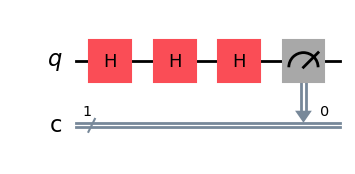

In [4]:
# As two Hadamard gates are equivalent to the identity, it is redundant to execute them

qc_step1 = QuantumCircuit(1,1)
qc_step1.h(0)
qc_step1.h(0)
qc_step1.h(0)
qc_step1.measure(0,0)

counts = backend.run(qc_step1, shots = 100).result().get_counts()
print(counts)

qc_step1.draw('mpl')

{'0': 54, '1': 46}


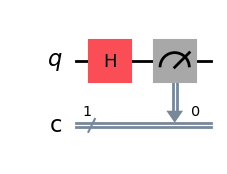

In [5]:
qc_step1_opt = QuantumCircuit(1,1)
qc_step1_opt.h(0)
qc_step1_opt.measure(0,0)
qc_step1_opt.draw('mpl')

counts = backend.run(qc_step1_opt, shots = 100).result().get_counts()
print(counts)

qc_step1_opt.draw('mpl')

In this example, we notice that the two Hadamard gates are equivalent to doing nothing (that is, is equivalent to the identity gate). This happens because the Hadamard is its own inverse gate! **What other quantum gates that you know also satisfy this property?**

The next step corresponds to decomposing all gates that act on three or more qubit. This is important, as IBM devices (and most quantum architectures) only allow to perform single qubit and two-qubit gates. As an example, les us consider the Toffoli gate.

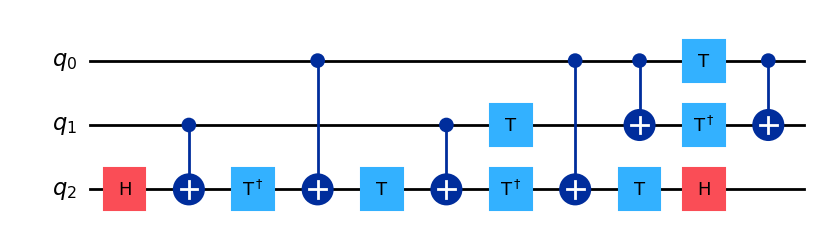

In [7]:
# change reps between 0 and 1

qc_ccx = QuantumCircuit(3)
qc_ccx.ccx(0, 1, 2)
qc_ccx.decompose(reps=1).draw(output='mpl')

The Tofolli gate is commonly decomposed in terms of Hadamard gates, $CNOT$ gates and $T$ gates. The $T$ gate induces a $\frac{\pi}{4}$ phase:

$$ T = \left( \begin{matrix} {1} & {0} \\ {0} & {e^{i \pi/ 4}} \\ \end{matrix} \right), \quad T^{\dagger} = \left( \begin{matrix} {1} & {0} \\ {0} & {e^{-i \pi/ 4}} \\ \end{matrix} \right) $$

and satisfies $T^4 = Z$, where $Z$ is the pauli $Z$ gate.

Quantum circuits (left) correspond to abstract entities, whose qubits are **virtual** representations of the **physical** (real) qubits that are used for computing. Therefore, in the third step, we need to map (assign) the virtual qubits in a one-to-one relationship to the physical qubits of the real quantum device (right), according to its connectivity (topology). This step is also known as the **Layout stage** or **Qubit Mapping**.

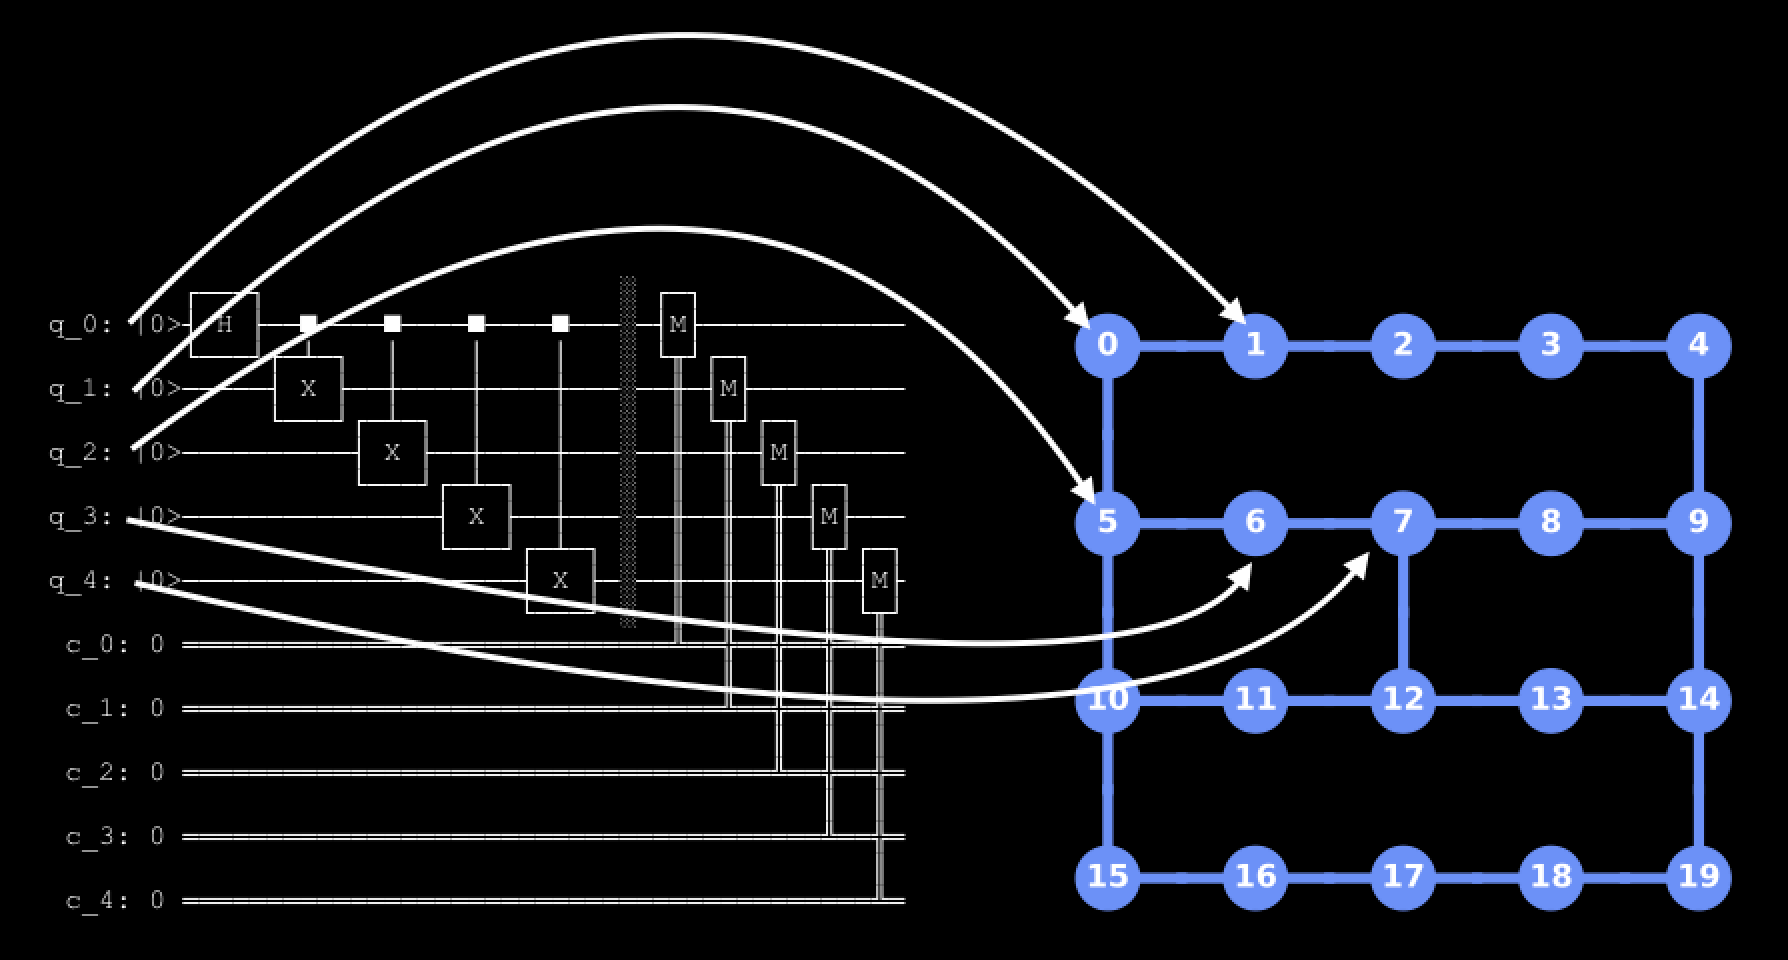

Upon inspecting the topology on the right, it is easy to see that there exists no qubit that is directly connected to every qubit. On the other hand, the quantum circuit on the left requires us to perform a $\mathrm{CNOT}$ gate between qubit $q_0$ and all the others. 

In order to implement a two-qubit gate between qubits that are not directly connected on a quantum device, one or more $\mathrm{SWAP}$ gates must be inserted into the circuit to move the qubit states around until they are adjacent on the device gate map. The task of injecting extra gates to the original circuit to make it compatible with the QPU's connectivity is called **Qubit Routing**.

{'00000': 481, '11111': 519}


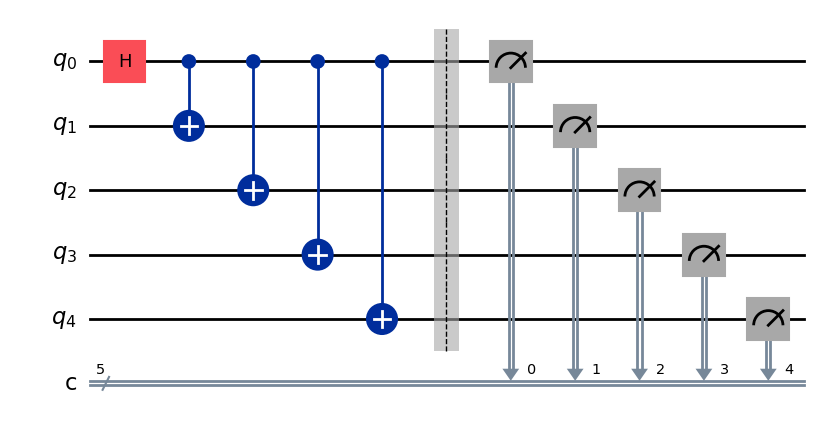

In [8]:
qc_step4 = QuantumCircuit(5,5)
qc_step4.h(0)
qc_step4.cx(0,1)
qc_step4.cx(0,2)
qc_step4.cx(0,3)
qc_step4.cx(0,4)
qc_step4.barrier()
qc_step4.measure(range(5), range(5))

counts = backend.run(qc_step4, shots = 1000).result().get_counts()
print(counts)

qc_step4.draw('mpl')

For simplicity, let us consider only the first ten qubits within the QPU's connectivity.

{'00000': 504, '11111': 496}


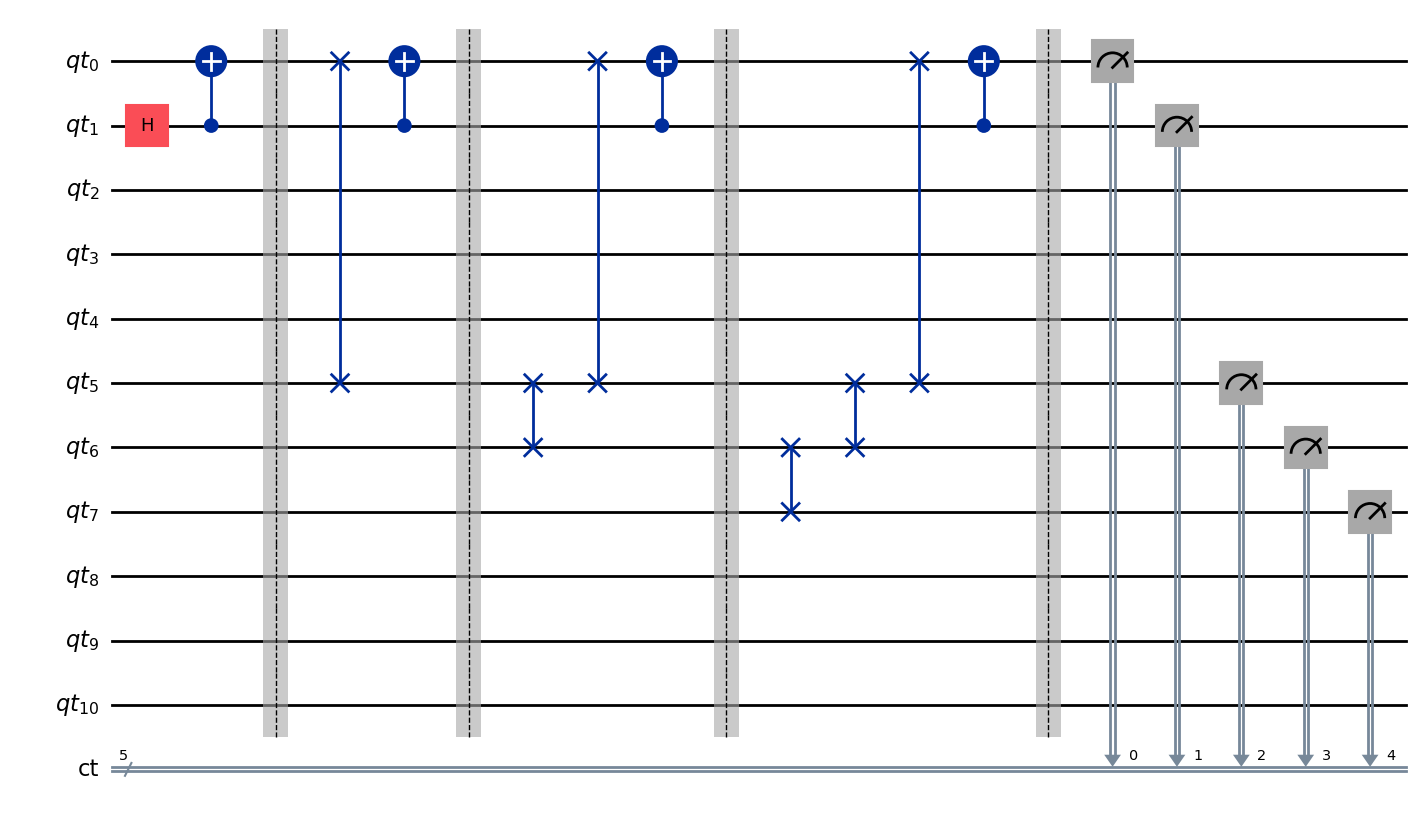

In [9]:
from qiskit import QuantumRegister, ClassicalRegister

# The connectivity goes 1 -> 0 -> 5 -> 6 -> 7

qr = QuantumRegister(11, name='qt')
cr = ClassicalRegister(5, name='ct')


qc_step4_opt = QuantumCircuit(qr,cr)
qc_step4_opt.h(1)
qc_step4_opt.cx(1,0)

qc_step4_opt.barrier()

qc_step4_opt.swap(5,0)
qc_step4_opt.cx(1,0)

qc_step4_opt.barrier()

qc_step4_opt.swap(6,5)
qc_step4_opt.swap(5,0)
qc_step4_opt.cx(1,0)

qc_step4_opt.barrier()

qc_step4_opt.swap(7,6)
qc_step4_opt.swap(6,5)
qc_step4_opt.swap(5,0)
qc_step4_opt.cx(1,0)

qc_step4_opt.barrier()
qc_step4_opt.measure([0, 1, 5, 6, 7], cr)

counts = backend.run(qc_step4_opt, shots = 1000).result().get_counts()
print(counts)

qc_step4_opt.decompose(reps=0).draw('mpl')

Observation: The $\mathrm{SWAP}$ gate is not native gate, and its decomposed as follows:

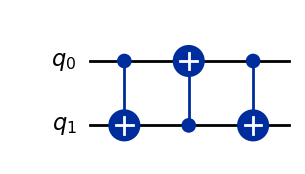

In [11]:
# change reps between 0 and 1

qc_swap = QuantumCircuit(2)
qc_swap.swap(0, 1)
qc_swap.decompose(reps=1).draw(output='mpl')

Two-qubit gates (like the $\mathrm{CNOT}$) are much noisier than single qubit gates, so each $\mathrm{SWAP}$ gate represents an expensive and noisy operation to perform. Thus, finding the minimum number of $\mathrm{SWAP}$ gates needed to map a circuit onto a given device is an important step in the transpilation process. For efficiency, this stage is typically computed alongside the Layout stage by default, but they are logically distinct from one another. The Layout stage selects the hardware qubits to be used, while the Routing stage inserts the appropriate amount of $\mathrm{SWAP}$ gates in order to execute the circuits using the selected layout.

**Exercise**: If we reconsider the previous example, it is easy to see that our mapping choice is not the best. What would be a better option? (For starters, which physical qubit seems better suited to be the first logical qubit?) Create a similar quantum circuit with a better choice of physical qubits, and design a circuit that uses less $\mathrm{SWAP}$ gates.

{'11111': 480, '00000': 520}


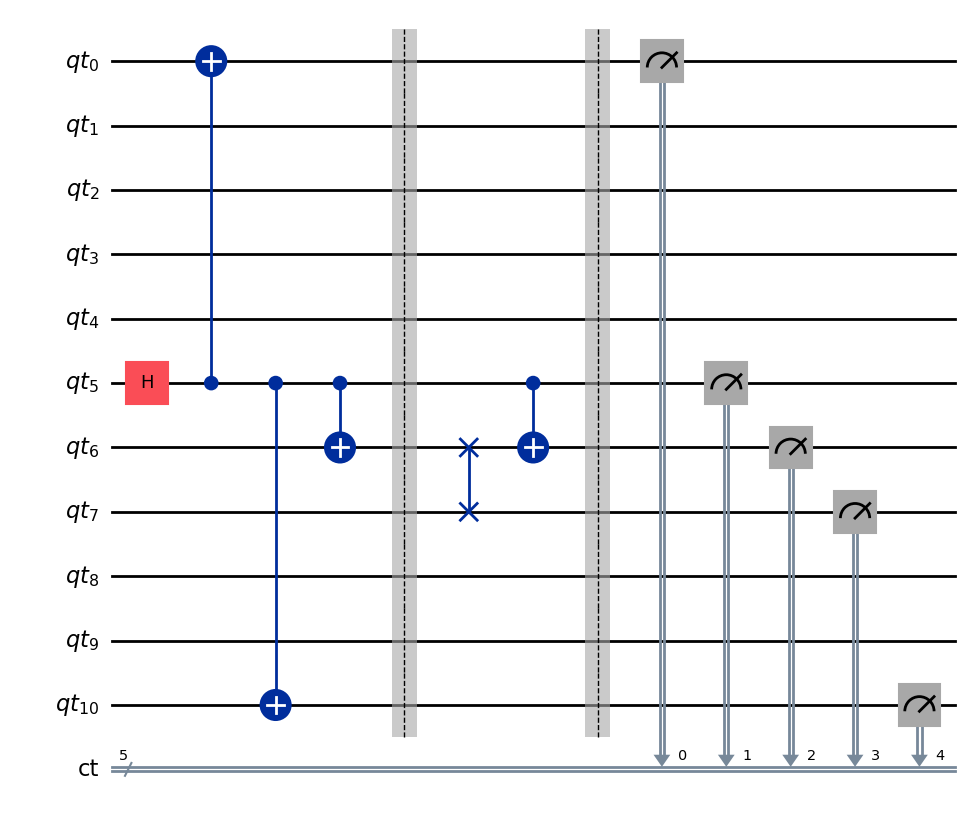

In [12]:
qr = QuantumRegister(11, name='qt')
cr = ClassicalRegister(5, name='ct')

qc_step4_op2t = QuantumCircuit(qr,cr)
qc_step4_op2t.h(5)
qc_step4_op2t.cx(5,0)
qc_step4_op2t.cx(5,10)
qc_step4_op2t.cx(5,6)

qc_step4_op2t.barrier()
qc_step4_op2t.swap(6,7)
qc_step4_op2t.cx(5,6)

qc_step4_op2t.barrier()
qc_step4_op2t.measure([0, 5, 6, 7, 10], cr)

counts = backend.run(qc_step4_op2t, shots = 1000).result().get_counts()
print(counts)

qc_step4_op2t.decompose(reps=0).draw('mpl')


When implementing a quantum circuit in a real quantum device, there is another metric that is relevant other than the number of $\mathrm{SWAP}$ gates (i.e. number of $\mathrm{CNOT}$ gates): the **depth** of the circuit. The depth of a quantum circuit is a measure of how many “layers” of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit. Because quantum gates take time to implement, the depth of a circuit roughly corresponds to the amount of time it takes the quantum computer to execute the circuit. Due to decoherence (i.e. interaction of the quantum systems with the environment), the longer the execution time, the higher the probability that an error occurs. Similarly, the number of qubits that we use for implementing an algorithm is known as the circuit **width**.

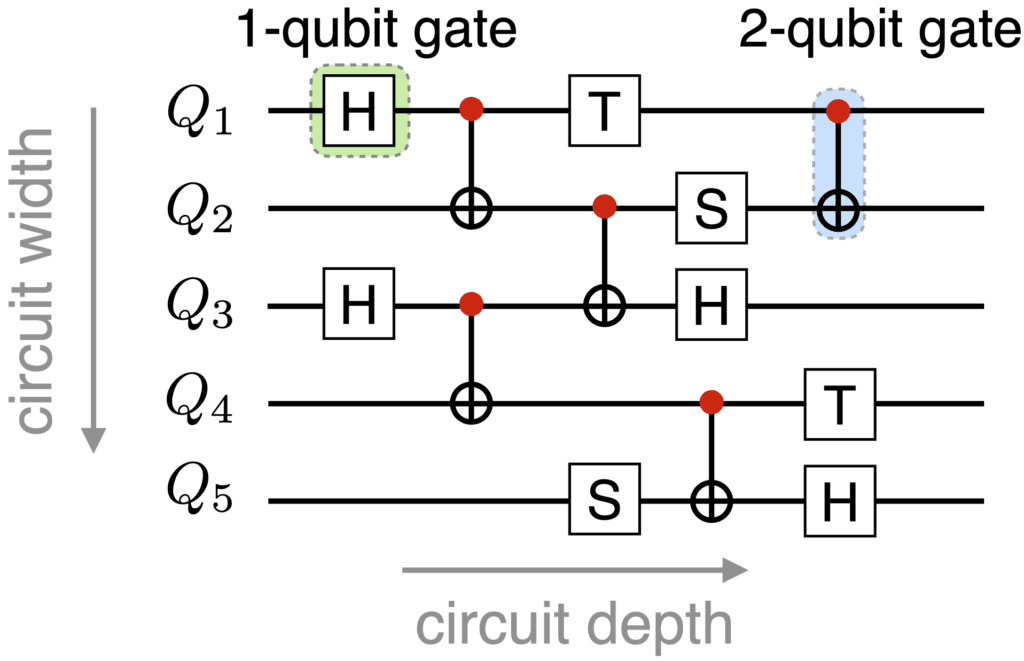

The depth of a circuit can be obtained using the `QuantumCircuit.depth()` method. Let's consider two circuits that prepare the same state, but have different depth.

6


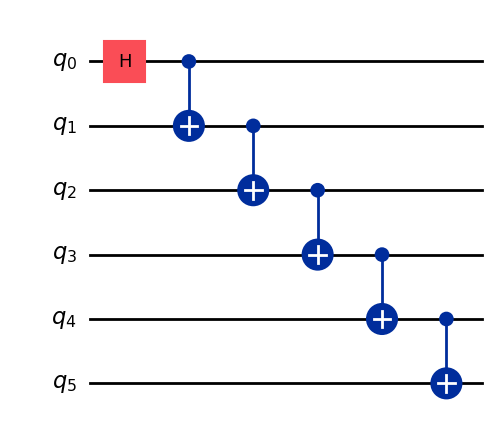

In [13]:
qc_dep1 = QuantumCircuit(6)
qc_dep1.h(0)
qc_dep1.cx(0, 1)
qc_dep1.cx(1, 2)
qc_dep1.cx(2, 3)
qc_dep1.cx(3, 4)
qc_dep1.cx(4, 5)

print(qc_dep1.depth())     # Depth of the circuit
qc_dep1.draw('mpl')

4


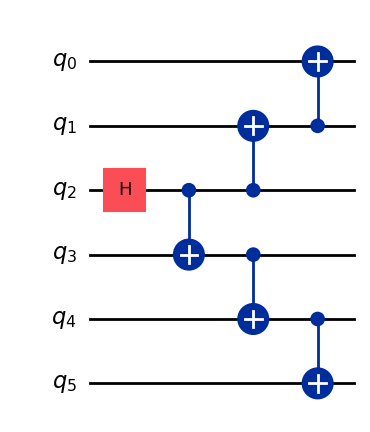

In [14]:
qc_dep2 = QuantumCircuit(6)
qc_dep2.h(2)
qc_dep2.cx(2, 3)
qc_dep2.cx(2, 1)
qc_dep2.cx(1, 0)
qc_dep2.cx(3, 4)
qc_dep2.cx(4, 5)

print(qc_dep2.depth())     # Depth of the circuit
qc_dep2.draw('mpl')

In [15]:
# Check that both states are the same

sv1 = Statevector(qc_dep1)
sv2 = Statevector(qc_dep2)

sv1 == sv2

True

A good transpilation method also to reduce the depth of a circuit as much as possible!

As mentioned in Notebook 2, each device has a corresponding native gate set, so the transpilation process also decomposes each gate in the virtual circuit into the corresponding combination of basis gates. This stage is also known as the **Translation stage**.

In [16]:
from qiskit_ibm_runtime.fake_provider import FakeCasablancaV2  # 7 qubit device
from qiskit import transpile

FakeCasablancaV2().operation_names
device = FakeCasablancaV2()   # we can use the fake device directly as a backend

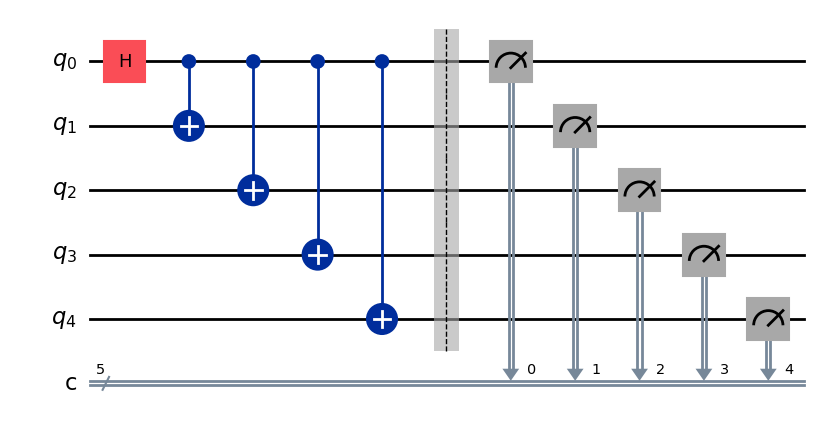

In [17]:
qc_step4.draw('mpl')

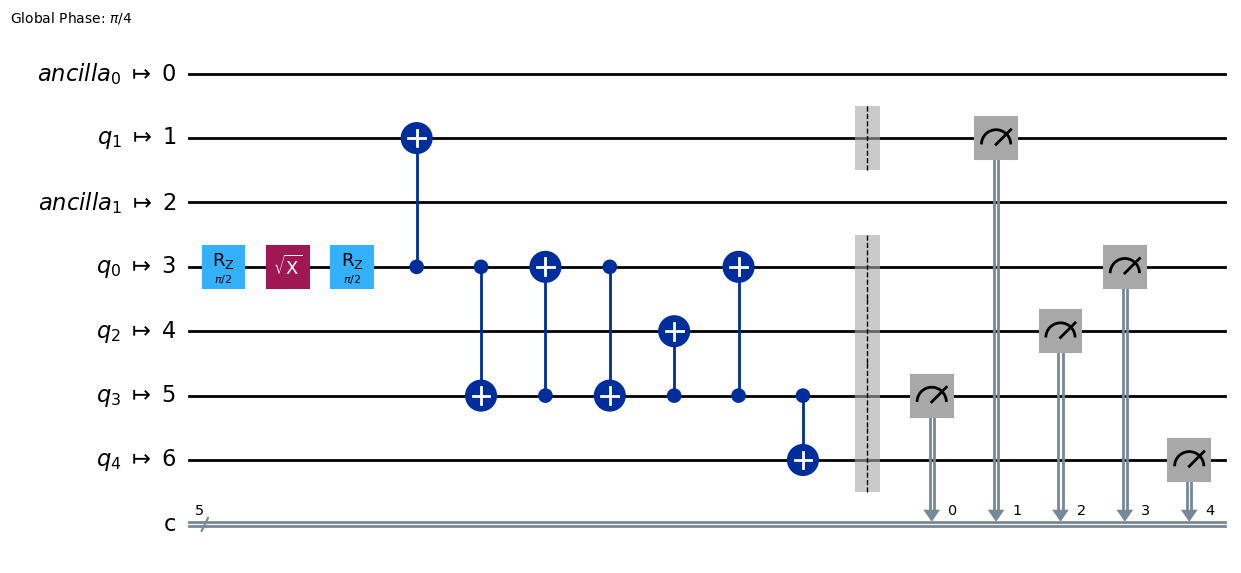

In [18]:
qc_tr = transpile(qc_step4, backend=device, seed_transpiler=0)
qc_tr.draw('mpl')

Notice that the transpilation process took care not only of the translation step, but also the mapping and routing steps. We can obtain the connectivity constrains of the fake backend as follows:

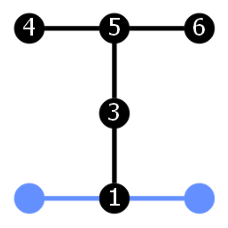

In [19]:
from qiskit.visualization import plot_circuit_layout  # Requires installing Graphviz 

plot_circuit_layout(qc_tr, device, view="physical")

The `transpile()` function corresponds to a default out-of-the-box transpiler. The recommended way to transpile circuits using the Qiskit SDK is through a `StagedPassManager`, which define a typical full compilation pipeline from an abstract virtual circuit to one that is optimized and capable of running on the specified backend, composed of the following six stages:

1. `init` stage: The `init` stage does very little by default and is primarily useful if you want to include your own initial optimizations. The two steps that we mentioned at the beginning (virtual circuit optimization and three qubit gate decomposition) are included within this stage.

2. `layout` stage.

3. `routing` stage.

4. `translation` stage.

5. `optimization` stage: The `optimization` stage centers around decomposing quantum circuits into the basis gate set of the target device, and must fight against the increased depth from the layout and routing stages.

6. `scheduling` stage: Does not run by default and it focuses on accounting for all the idle time in a circuit (examples include Dynamical Decoupling methods to reduce errors that arise in real QPUs).

A preset staged pass manager can be created through the `generate_preset_pass_manager` function, and the transpilation itself is obtained through the `generate_preset_pass_manager.run()` method. These pass managers are highly customizable, therefore we wil concentrate on the following parameters for simplicity:

* `optimization_level`
* `seed_transpiler`
* `coupling_map`
* `initial_layout`
* `basis_gates`
* `backend`

The `optimization_level` parameter takes values $0$,$1$,$2$ or $3$, where $0$ is no optimization and $3$ is the highest optimization available. Depending on the desired optimization level, this setting will choose the pertinent initial layout, gate optimization, routing, etc. Before checking the performance of the different optimization levels, let us check the other parameters first. For starters, lets consider first a simple example on a fake backend of $5$ qubits, and another example on a fake backend of $27$ qubits with a $12$ qubits circuit with high connectivity.

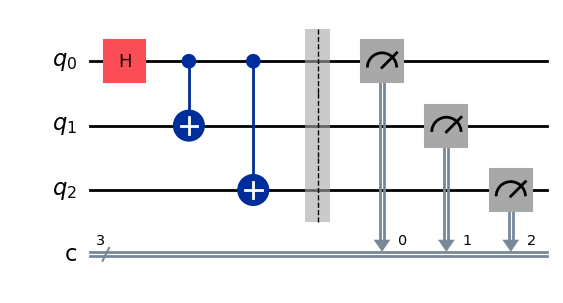

In [20]:
ghz = QuantumCircuit(3, 3)
ghz.h(0)
ghz.cx(0,range(1,3))
ghz.barrier()
ghz.measure(range(3), range(3))
ghz.draw(output='mpl')

First, we will transpile the circuit considering only the topology of the fake backend. This topology is given by the **coupling map**: a graph where each node correspond to a qubit, and the edges correspond to the connectivity between qubits.

We will set the optimization level $0$ (no optimization), which considers a **trivial** initial layout, that is, it assigns logical qubit $n$ to the physical qubit $n$. 

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


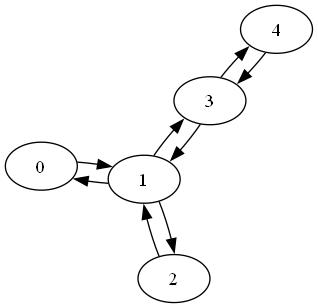

In [21]:
from qiskit_ibm_runtime.fake_provider import FakeVigoV2         # 5 qubit device

device2 = FakeVigoV2()

coupling_map = device2.coupling_map     # get coupling map
print(coupling_map)
coupling_map.draw()

We transpile considering the topology of the backend through the `coupling_map` argument. In general, the transpilation process used in Qiskit are **stochastic**, so it is expected to perform differently each time the code is executed. To avoid that, we will consider a fix random seed through the `seed_transpiler` setting.

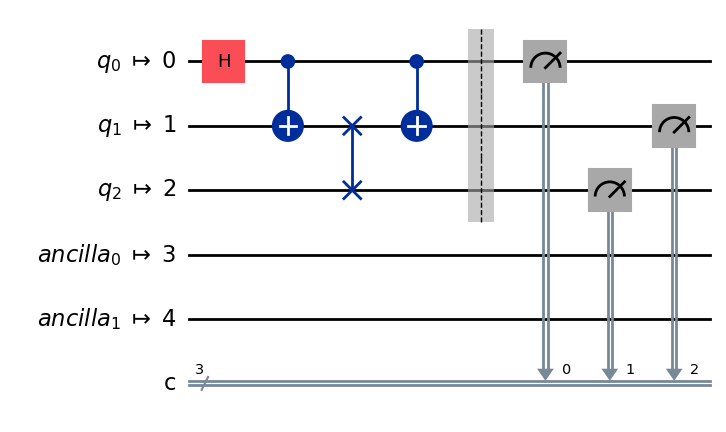

In [22]:
from qiskit.transpiler import generate_preset_pass_manager

# this pass manager will adds a swap between qubit 1 and 2, to satisfy connectivity constraints

pm1 = generate_preset_pass_manager(coupling_map=coupling_map,
                                   optimization_level=0,
                                   seed_transpiler=0)

ghz_tr_cm = pm1.run(ghz)
ghz_tr_cm.draw(output='mpl')

We can specify the Layout directly through the `initial_layout` argument. Notice that this choice is more efficient, as we got rid of one $\mathrm{SWAP}$ gate.

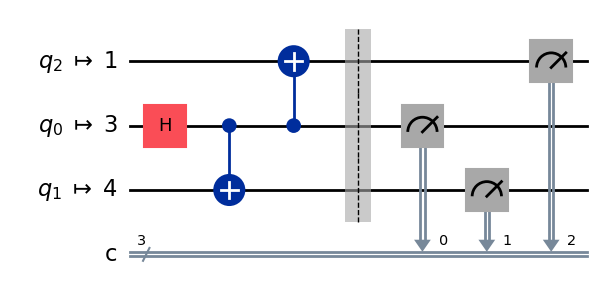

In [25]:
# Virtual -> Physical
#    0    ->    3
#    1    ->    4
#    2    ->    1

initial_layout = [3, 4, 1]

pm2 = generate_preset_pass_manager(coupling_map=coupling_map,
                                    initial_layout=initial_layout,
                                    optimization_level=0,
                                    seed_transpiler=0)

ghz_tr_il = pm2.run(ghz)
ghz_tr_il.draw('mpl', idle_wires=False) # with the argument idle_wires set to False: we plot only the qubits that have gates on them

Finally, we include the basis gates from our fake backend into the transpilation process through the `basis_gates` parameter.

In [26]:
basis_gates = device2.operation_names
print(basis_gates)

['cx', 'id', 'x', 'reset', 'measure', 'rz', 'delay', 'sx']


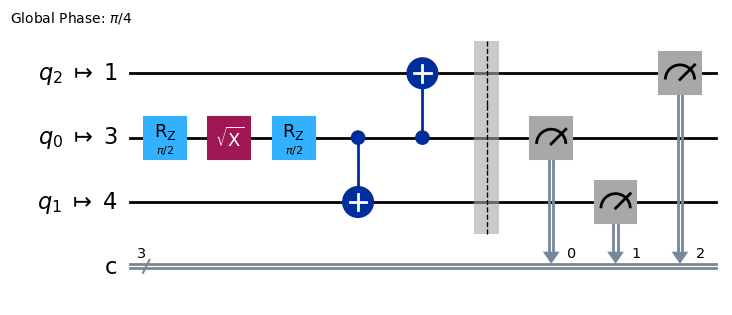

In [27]:
pm3 = generate_preset_pass_manager(basis_gates=basis_gates,
                                    coupling_map=coupling_map,
                                    initial_layout=initial_layout,
                                    optimization_level=0,
                                    seed_transpiler=0)

ghz_tr = pm3.run(ghz)
ghz_tr.draw('mpl', idle_wires=False)

Let us consider now a more difficult example: an `efficient_su2` circuit of $12$ qubits and a $27$ qubits fake backend.

16


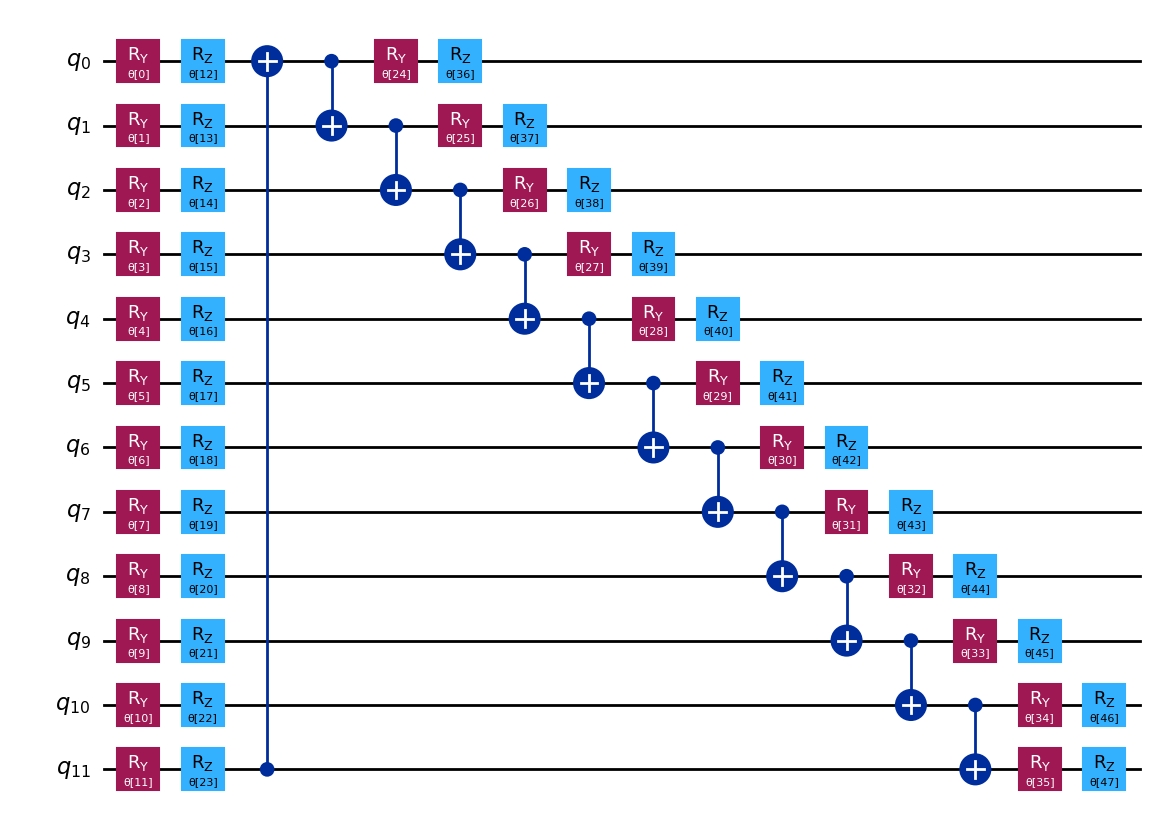

In [31]:
from qiskit.circuit.library import efficient_su2

su2 = efficient_su2(12, entanglement="circular", reps=1)

print(su2.depth())
su2.draw("mpl")

In [32]:
from qiskit_ibm_runtime.fake_provider import FakeAuckland       # 27 qubit device

device3 = FakeAuckland()
coupling_map2 = device3.coupling_map

basis_gates2 = list(device3.operation_names)
print(basis_gates2)

['cx', 'id', 'rz', 'if_else', 'delay', 'sx', 'switch_case', 'x', 'reset', 'measure', 'for_loop']


111


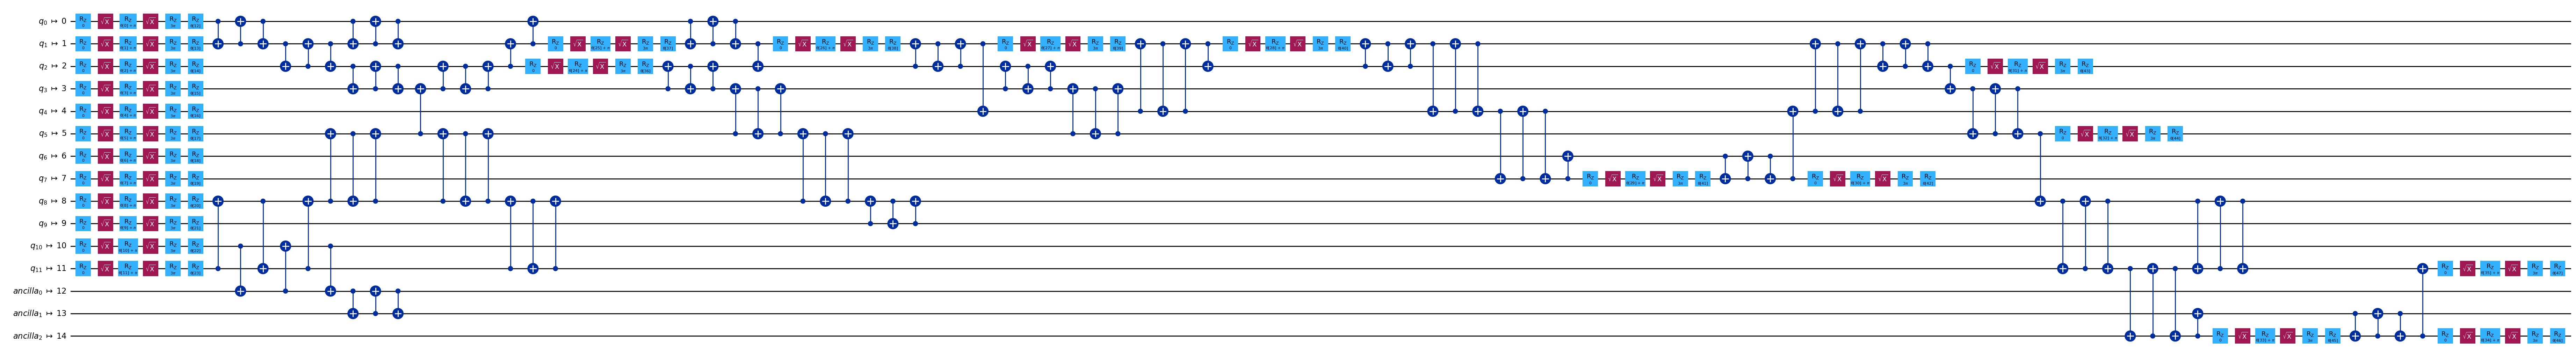

In [36]:
pm4 = generate_preset_pass_manager(basis_gates=basis_gates2,
                                    coupling_map=coupling_map2,
                                    optimization_level=0,
                                    seed_transpiler=0)
su2_tr = pm4.run(su2)

print(su2_tr.depth())
su2_tr.draw("mpl", idle_wires=False, fold=-1)  # the fold parameter set to -1 allows us to draw the circuit without cutting

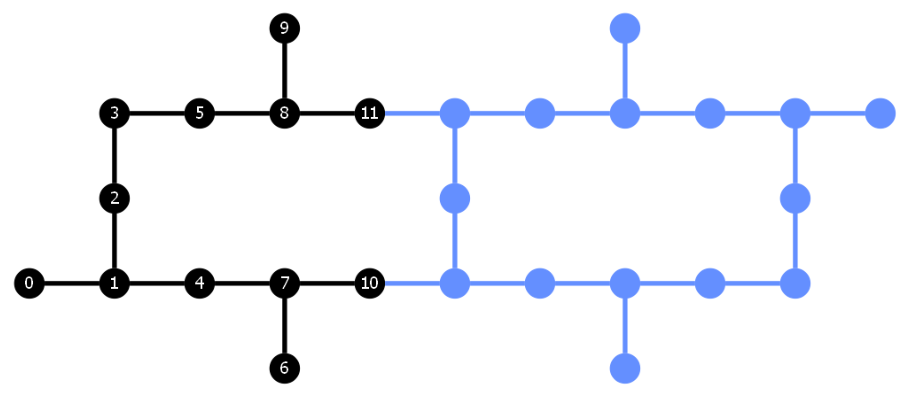

In [37]:
plot_circuit_layout(su2_tr, device3, view="physical")

The different optimization levels aim to reduce both the number gates (specially the number of required $\mathrm{SWAP}$ gates) and the overall circuit depth. To achieve this, different circuit synthesis, layout and routing methods are considered. Further details are explained [here](https://docs.quantum.ibm.com/guides/set-optimization).


Finding the minimum number of $\mathrm{SWAP}$ gates required is a hard task, in fact, finding the optimal solution to the routing problem belongs to the class of **NP-Hard problems**, becoming too costly to solve for large problems, thus **heuristic methods** are preferred. For now, we will just compare the performance of these methods. Let us consider for example the previous example, but setting the optimization level to $1$.

22


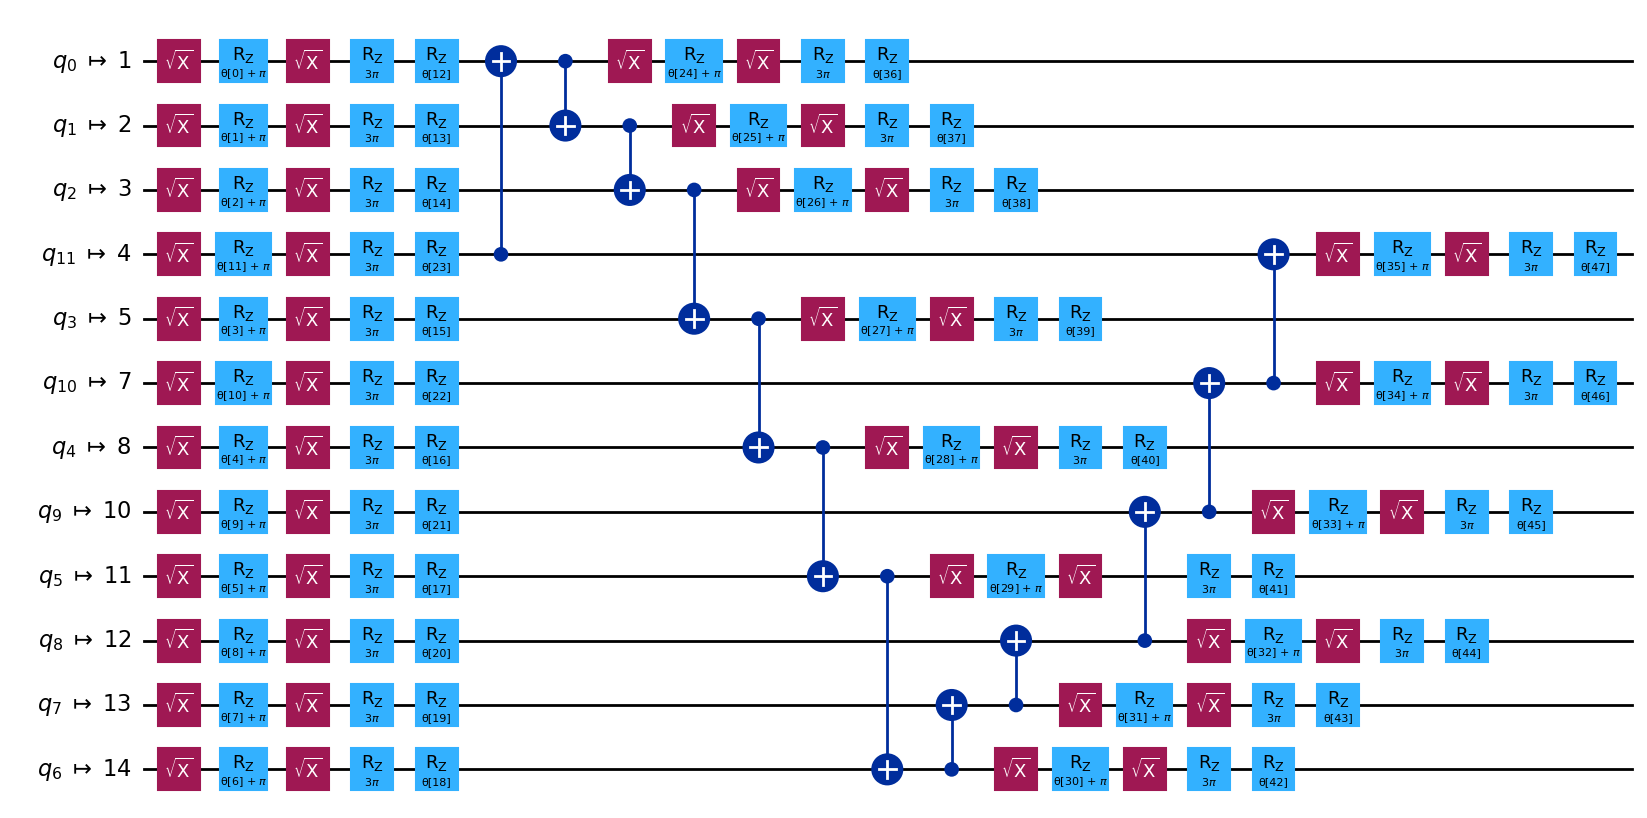

In [38]:
pm5 = generate_preset_pass_manager(basis_gates=basis_gates2,
                                    coupling_map=coupling_map2,
                                    optimization_level=1,
                                    seed_transpiler=0)
su2_tr_2 = pm5.run(su2)

print(su2_tr_2.depth())
su2_tr_2.draw("mpl", idle_wires=False, fold=1)  # the fold parameter set to -1 allows us to draw the circuit without cutting

In [ ]:
plot_circuit_layout(su2_tr_2, device3, view="physical")

Let us now compare between the $4$ possible optimization levels, for a highly entangled circuit of $15$ qubits, and compare depth and gate count. As a rule of thumb, the higher the optimization level, the more classical resources are needed (i.e. the more time it takes to transpile).

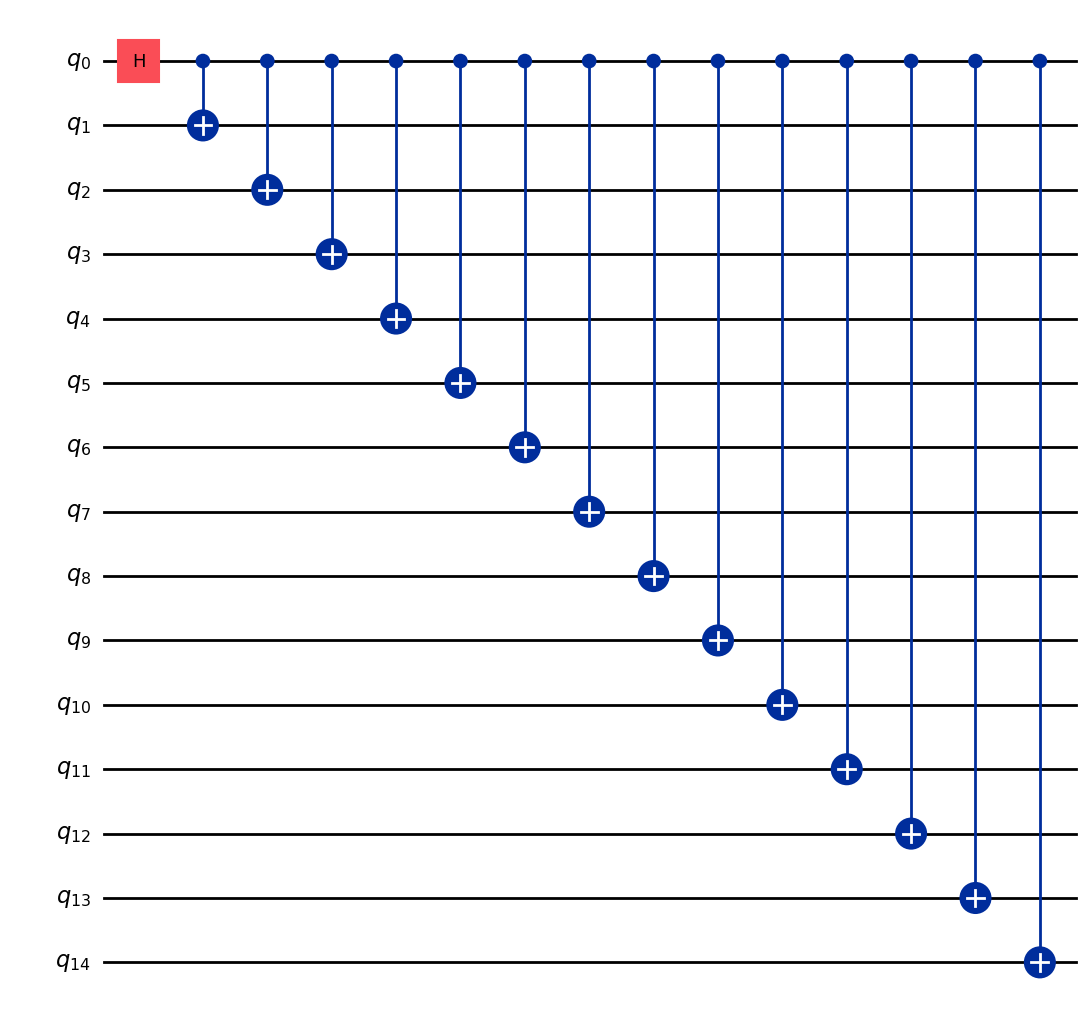

In [39]:
from qiskit_ibm_runtime.fake_provider import FakeBoeblingenV2   # backend de 20 qubits
device4 = FakeBoeblingenV2()  

ghz_15 = QuantumCircuit(15)
ghz_15.h(0)
ghz_15.cx(0, range(1, 15))
ghz_15.draw('mpl', fold=-1)

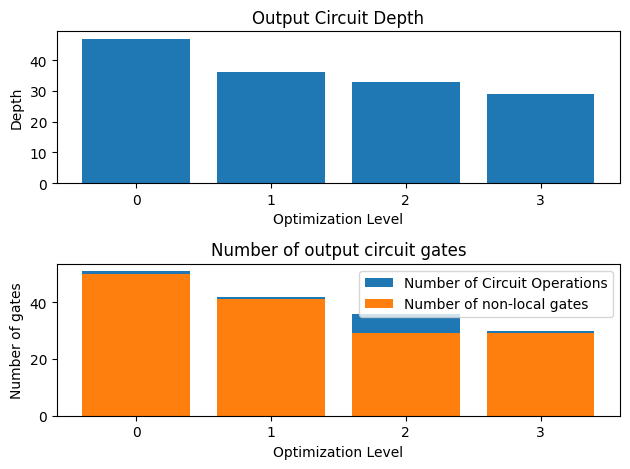

In [40]:
import matplotlib.pyplot as plt
 
depths = []                                       # depth
gate_counts = []                                  # number of single qubit gates
non_local_gate_counts = []                        # number of two-qubit gates
levels = [str(x) for x in range(4)]
for level in range(4):

     # We can specify the backend directly in the pass manager!

     pm_test = generate_preset_pass_manager(backend=device4,
                                    optimization_level=level,
                                    seed_transpiler=147)
     
     circ = pm_test.run(ghz_15)
     depths.append(circ.depth())
     gate_counts.append(sum(circ.count_ops().values()))               # get the number of gates
     non_local_gate_counts.append(circ.num_nonlocal_gates())          # get the number of non-local gates

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.bar(levels, depths, label='Depth')
ax1.set_xlabel("Optimization Level")
ax1.set_ylabel("Depth")
ax1.set_title("Output Circuit Depth")
ax2.bar(levels, gate_counts, label='Number of Circuit Operations')
ax2.bar(levels, non_local_gate_counts, label='Number of non-local gates')
ax2.set_xlabel("Optimization Level")
ax2.set_ylabel("Number of gates")
ax2.legend()
ax2.set_title("Number of output circuit gates")
fig.tight_layout()
plt.show()

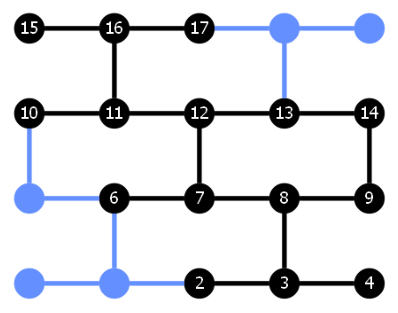

In [41]:
plot_circuit_layout(circ, device4, view="physical")        # let us also check the topology of the fake backend